## Experimentos: hiperparámetro $\alpha$.

Imports.

In [1]:
import src.game_builder as gb

import utils.chart as chart
import utils.metric as mu
import utils.tests as test

import matplotlib.pyplot as plt
import numpy as np
import random

Configuración de semilla.

In [2]:
RANDOM_SEED = 823
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

Configuración de experimentos.

In [3]:
test_cases = test.get_test_cases(10)
rounds = 100
protocol_providers= [
    lambda alpha : gb.cm(alpha = alpha),
    lambda alpha : gb.mwm(alpha = alpha),
    lambda alpha : gb.ewl(alpha = alpha, n_params_per_qubit = 2)]
alphas = np.arange(0.05, 2.01, 0.05)

Ejecución de experimentos.

In [4]:
execution_metrics = test.execute_hyperparameter_test(rounds, test_cases, protocol_providers, alphas)

Visualización de resultados.

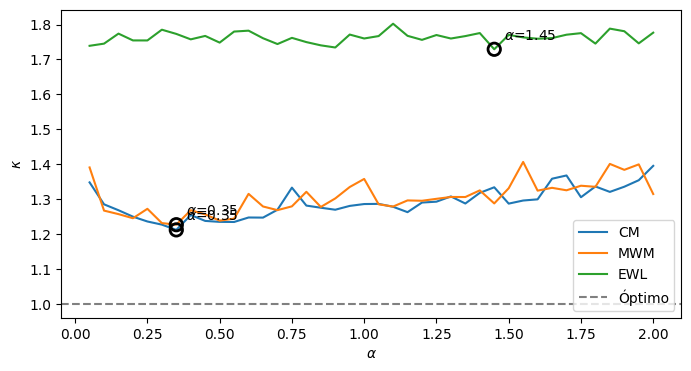

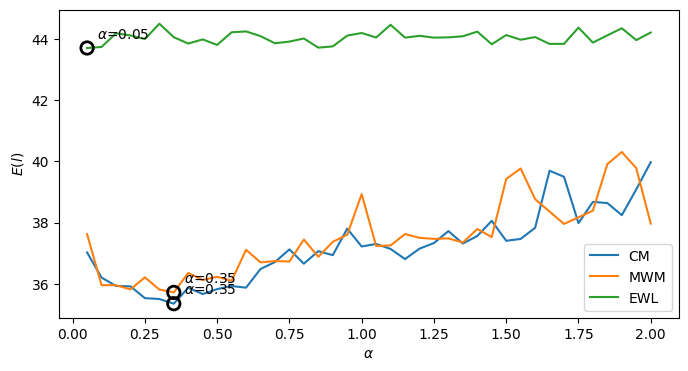

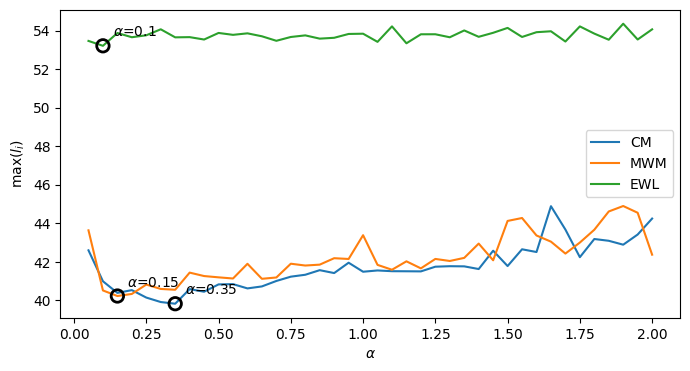

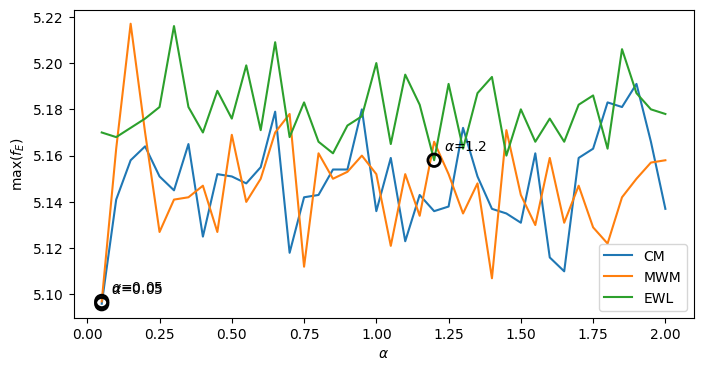

In [6]:
for metric, metric_label in mu.MEAN_METRICS:
    chart.series(alphas, [[m[metric] for m in pm] for pm in execution_metrics], [p(1).get_name() for p in protocol_providers], (r"$\alpha$", metric_label), 
                 window=1, optimal=1 if ("poa" in metric) else None, show_mins=True, figsize=(8,4))